# Parsing arbitrary trace events

`trappy` knows about some trace events. You can add your own in the notebook without having to change any code in `trappy`.  After the trace is registered, the next time you parse a trace file that information will be part of the trace object as a pandas `DataFrame` and can be analyzed like the other `DataFrame`s in the `FTrace` class.

The trace event must follow the following format:

    title: key0=value0 key1=value1 key2=value2 ...

The title should be something that's unique in the trace.  For example, you can generate trace with the following `trace_printk()`:

    trace_printk("thermal_gpu_power_get: frequency=%u load=%d\n", freq, load);

which will appear in the `trace.txt` as:

    kworker/6:1-457   [006]   144.439566: bprint:               0xc042f8a0f: thermal_gpu_power_get: frequency=177 load=0

You can add this event to the trace instance using the `events` argument of the `FTrace` class. By using `scope=custom`, we limit the parsing to the events we define, making parsing much faster.

In [19]:
import sys
sys.path.append("..")
%matplotlib inline
import trappy

Parse the trace with the `events` keyword

In [22]:
trace = trappy.FTrace("trace_dynamic.txt", events=["thermal_gpu_power_get"], scope="custom")

`trace` now has a `thermal_gpu_power_get` member that contains the information.  We can see the first few lines of the generated dataframe:

In [25]:
trace.thermal_gpu_power_get.data_frame.head()

,__comm,__cpu,__line,__pid,frequency,load
Time,,,,,,
0.0,kworker/6:1,0,0,457,420,91
0.1,kworker/6:1,0,1,457,420,90
0.2,kworker/6:1,0,2,457,420,91
0.3,kworker/6:1,0,3,457,420,90
0.4,kworker/6:1,0,4,457,420,95


We can now plot it or manipulate it as any other `DataFrame` in pandas

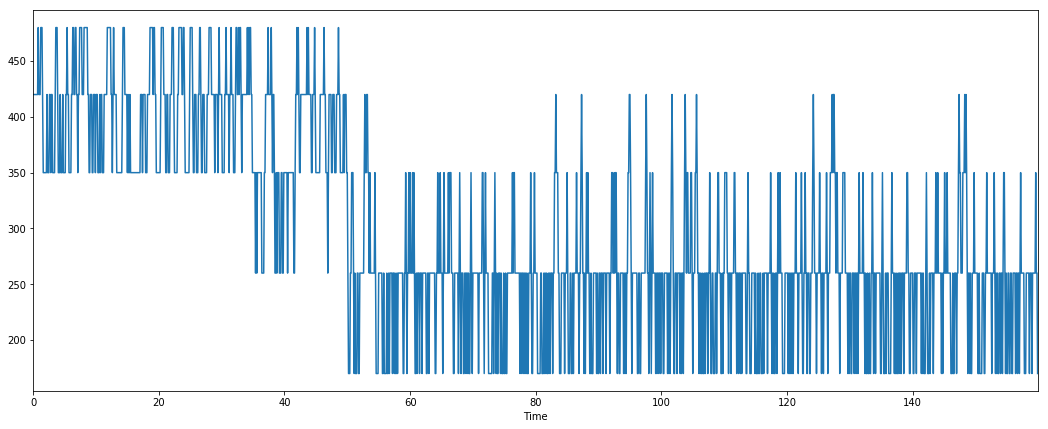

In [26]:
trace.thermal_gpu_power_get.data_frame["frequency"].plot(figsize=(18, 7))